# Imports

In [1]:
!pip install --upgrade pyalgotrading


In [2]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [3]:
connection = AlgoBullsConnection()

In [4]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [5]:
API_TOKEN = "c3477e22990b004e542ac6eaee59d3cc961816f5"
connection.set_access_token(API_TOKEN)

Access token is valid.


# Strategy Creation

## Import Strategy from pyaglostrategypool

In [11]:
! wget -O obv_breakout.py https://raw.githubusercontent.com/Sriramg89/pyalgostrategypool/master/pyalgostrategypool/obv_breakout/_strategy.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' obv_breakout.py

--2024-12-27 10:02:50--  https://raw.githubusercontent.com/Sriramg89/pyalgostrategypool/master/pyalgostrategypool/obv_breakout/_strategy.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2668 (2.6K) [text/plain]
Saving to: 'obv_breakout.py'

obv_breakout.py     100%[===================>]   2.61K  --.-KB/s    in 0s      

2024-12-27 10:02:51 (5.76 MB/s) - 'obv_breakout.py' saved [2668/2668]

sed: 1: "obv_breakout.py": invalid command code o


In [13]:
from obv_breakout import OBVBreakout as strategy_cls

In [14]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 160095,
 'strategyId': '7a06346007e447ac90722b5d9388d1f7'}

In [15]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [16]:
instrument = connection.search_instrument('RELIANCE', exchange='NSE')
instrument

[{'id': 87262, 'value': 'NSE:RCOM'},
 {'id': 111920, 'value': 'NSE:RELCAPITAL'},
 {'id': 396, 'value': 'NSE:RELIANCE'},
 {'id': 1674243, 'value': 'NSE:RELIANCE.AF'},
 {'id': 1674337, 'value': 'NSE:RELIANCE.BL'},
 {'id': 1674465, 'value': 'NSE:RELIANCE.RL'},
 {'id': 1674886, 'value': 'NSE:RELIANCEP1'},
 {'id': 1674887, 'value': 'NSE:RELIANCEP1.BL'},
 {'id': 556791, 'value': 'NSE:RELIANCEP1.E1'},
 {'id': 1674737, 'value': 'NSE:RELIANCEPP.BL'}]

## Setup Parameters

In [17]:
parameters = {
  'TIME_PERIOD': 14  # Time period for OBV and its SMA (can be adjusted based on your strategy's needs)
}

In [18]:
initial_virtual_funds = 1000000000     # in Rupees

## Backtesting

### Start

In [19]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 +0530', 
    end='2022-07-31 15:30 +0530',
    instrument='NSE:RELIANCE', 
    lots=5,
    parameters=parameters, 
    candle='1 hour',                   # Use daily candles
    initial_funds_virtual=initial_virtual_funds
)


Starting the strategy 'OBV Breakout' in BACKTESTING mode...
╒═════════════════════════╤═══════════════════════════╕
│ Config                  │ Value                     │
╞═════════════════════════╪═══════════════════════════╡
│ Strategy Name           │ OBV Breakout              │
├─────────────────────────┼───────────────────────────┤
│ Trading Type            │ BACKTESTING               │
├─────────────────────────┼───────────────────────────┤
│ Instrument(s)           │ ['NSE:RELIANCE']          │
├─────────────────────────┼───────────────────────────┤
│ Quantity/Lots           │ 5                         │
├─────────────────────────┼───────────────────────────┤
│ Start Timestamp         │ 2021-08-01 09:15:00+05:30 │
├─────────────────────────┼───────────────────────────┤
│ End Timestamp           │ 2022-07-31 15:30:00+05:30 │
├─────────────────────────┼───────────────────────────┤
│ Parameters              │ {'TIME_PERIOD': 14}       │
├─────────────────────────┼────────────────

### Status

In [20]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [21]:
logs = connection.get_backtesting_logs(strategy)

Looking for a dedicated virtual server to execute your strategy... (2)

In [22]:
print(logs)

[2024-12-27 10:03:16] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2024-12-27 10:03:16] Sanity checks on cfg successful.
[2024-12-27 10:03:16] Currency set to "INR"
[2024-12-27 10:03:16] Setting up broker connection...
[2024-12-27 10:03:18] Broker connection has been setup successfully.
[2024-12-27 10:03:18] (NSE_EQ) Funds available in client's ABVIRTUALBROKER account is : INR '1000000000.00'
[2024-12-27 10:03:18] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2024-12-27 10:03:18] Welcome ALGOBULLS VIRTUAL USER!
[2024-12-27 10:03:18] Reading strategy...
[2024-12-27 10:03:18] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...

          #####  #######    #    ######  ####### ### #     #  #####
         #     #    #      # #   #     #    #     #  ##    # # 

### Stop

In [23]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


### Profit and Loss Reports

In [24]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,entry_variety,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,exit_variety,pnl_absolute,pnl_cumulative_absolute,brokerage,net_pnl
0,NSE,RELIANCE,2021-08-01 09:15:00+05:30,BUY,5,₹,2037.00,,2021-08-01 10:15:00+05:30,SELL,5,₹,2037.00,,0.00,0.00,0,0.00
1,NSE,RELIANCE,2021-08-01 10:15:00+05:30,BUY,5,₹,2037.00,,2021-08-01 11:15:00+05:30,SELL,5,₹,2037.00,,0.00,0.00,0,0.00
2,NSE,RELIANCE,2021-08-01 11:15:00+05:30,BUY,5,₹,2037.00,,2021-08-01 12:15:00+05:30,SELL,5,₹,2037.00,,0.00,0.00,0,0.00
3,NSE,RELIANCE,2021-08-01 12:15:00+05:30,BUY,5,₹,2037.00,,2021-08-01 13:15:00+05:30,SELL,5,₹,2037.00,,0.00,0.00,0,0.00
4,NSE,RELIANCE,2021-08-01 13:15:00+05:30,BUY,5,₹,2037.00,,2021-08-01 14:15:00+05:30,SELL,5,₹,2037.00,,0.00,0.00,0,0.00
5,NSE,RELIANCE,2021-08-01 14:15:00+05:30,BUY,5,₹,2037.00,,2021-08-01 15:15:00+05:30,SELL,5,₹,2037.00,,0.00,0.00,0,0.00
6,NSE,RELIANCE,2021-08-01 15:15:00+05:30,BUY,5,₹,2037.00,,2021-08-01 15:30:00+05:30,SELL,5,₹,2037.00,,0.00,0.00,0,0.00
7,NSE,RELIANCE,2021-08-02 09:15:00+05:30,BUY,5,₹,2054.30,,2021-08-02 15:30:00+05:30,SELL,5,₹,2073.20,,94.50,94.50,0,94.50
8,NSE,RELIANCE,2021-08-06 12:15:00+05:30,SELL,5,₹,2091.60,,2021-08-06 15:30:00+05:30,BUY,5,₹,2088.10,,17.50,112.00,0,17.50
9,NSE,RELIANCE,2021-08-10 10:15:00+05:30,BUY,5,₹,2094.50,,2021-08-10 15:30:00+05:30,SELL,5,₹,2088.35,,-30.75,81.25,0,-30.75


### Statistics Reports

#### Statistics

In [25]:
connection.get_backtesting_report_statistics(strategy)

Generating Statistics for already fetched P&L data...


/Users/sriram/anaconda3/lib/python3.9/site-packages/pyalgotrading/algobulls/connection.py:622: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info
/Users/sriram/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
/Users/sriram/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
/Users/sr

                    Strategy
------------------  ------------------------
Start Period        2021-08-01
End Period          2022-07-28
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   -
CAGR﹪              0.0%

Sharpe              0.86
Prob. Sharpe Ratio  80.92%
Sortino             1.39
Sortino/√2          0.99
Omega               1.19

Max Drawdown        -0.0%
Longest DD Days     154

Gain/Pain Ratio     0.24
Gain/Pain (1M)      1.93

Payoff Ratio        1.46
Profit Factor       -
Common Sense Ratio  1.52
CPC Index           0.78
Tail Ratio          1.0
Outlier Win Ratio   1.0
Outlier Loss Ratio  -

MTD                 1.0000190011684508e+137%
3M                  -
6M                  -
YTD                 -
1Y                  -
3Y (ann.)           0.0%
5Y (ann.)           0.0%
10Y (ann.)          0.0%
All-time (ann.)     0.0%

Avg. Drawdown       -0.0%
Avg. Drawdown Days  26
Recovery Factor     1.3
Ulcer Index         0.0
Serenity Index      2.6457998766648

#### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/Users/sriram/anaconda3/lib/python3.9/site-packages/pyalgotrading/algobulls/connection.py:622: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2021-08-01
End Period                 2022-07-28
Risk-Free Rate             0.0%
Time in Market             77.0%

Cumulative Return          0.0%
CAGR﹪                     0.0%

Sharpe                     0.86
Prob. Sharpe Ratio         80.88%
Smart Sharpe               0.83
Sortino                    1.39
Smart Sortino              1.34
Sortino/√2                 0.99
Smart Sortino/√2           0.95
Omega                      1.19

Max Drawdown               -0.0%
Longest DD Days            154
Volatility (ann.)          0.0%
Calmar                     0.91
Skew                       0.0
Kurtosis                   0.0

Expected Daily %           0.0%
Expected Monthly %         0.0%
Expected Yearly %          0.0%
Kelly Criterion            7.3%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.0%
Expected Shortfall (cVaR)  -0.0%

Max Consecutive Wins       5
Max Consecutiv

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-12-17,2022-05-16,2022-05-20,154,-0.000109,-0.000106
2,2022-06-15,2022-06-23,2022-07-28,44,-0.000074,-0.000072
3,2021-09-16,2021-10-01,2021-10-27,42,-0.000042,-0.000042
4,2022-05-31,2022-06-01,2022-06-09,10,-0.000033,-0.000031
5,2021-11-22,2021-11-22,2021-11-24,3,-0.000025,-0.000018


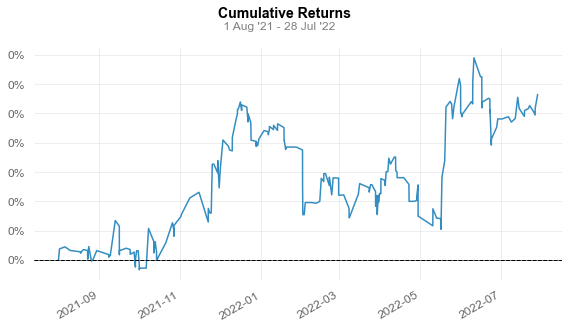

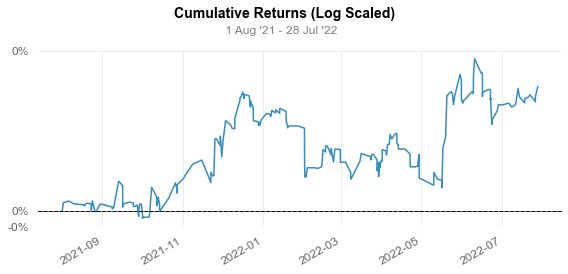

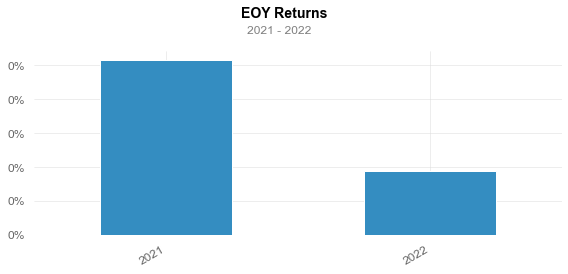

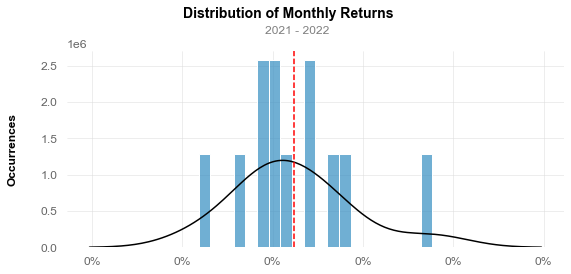

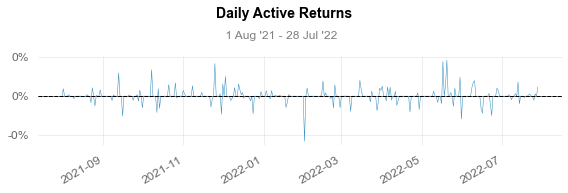

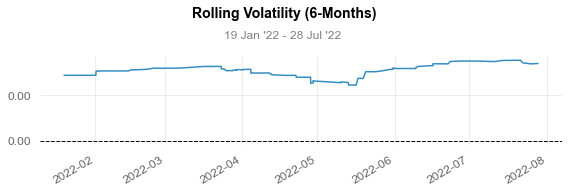

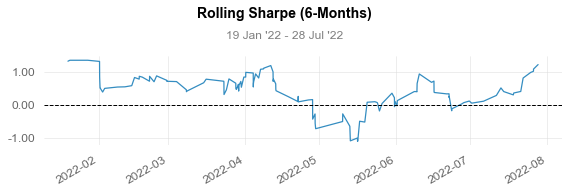

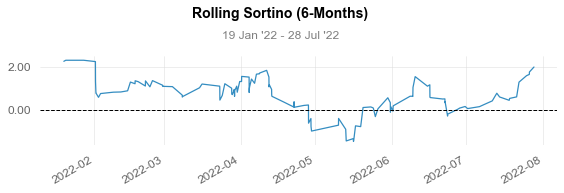

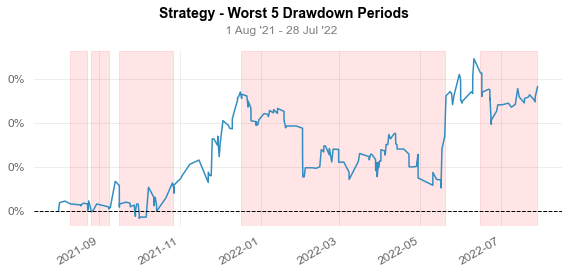

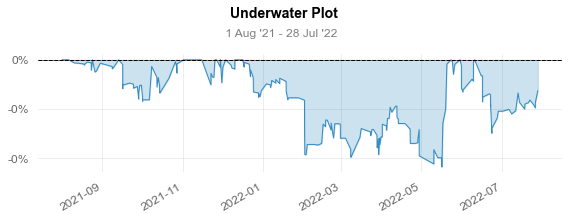

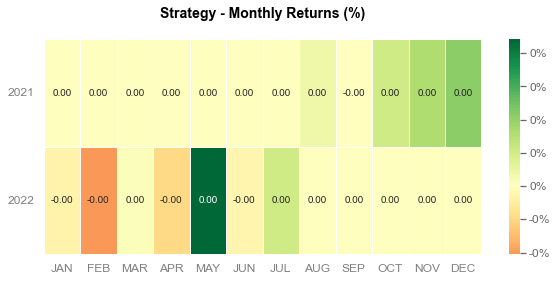

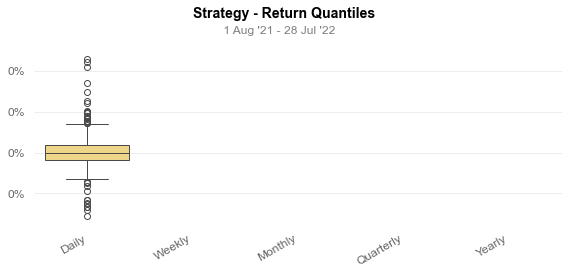

In [26]:
connection.get_backtesting_report_statistics(strategy, report='full', html_dump=False )

### Order History

In [27]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)

+------------------+----------------------------------+
| Order ID         | 2937f09916fc4eacafc1776a6fd6d408 |
| Transaction Type | SELL                             |
| Instrument       | NSE:RELIANCE                     |
| Quantity         | 5                                |
| Price            | ₹2457.9                          |
+------------------+----------------------------------+
+-----------------------------+------------------------+
| timestamp_created           | state                  |
|-----------------------------+------------------------|
| 2024-12-27T04:34:02.916573Z | COMPLETE               |
| 2024-12-27T04:34:02.916556Z | OPEN                   |
| 2024-12-27T04:34:02.916537Z | OPEN PENDING           |
| 2024-12-27T04:34:02.916516Z | VALIDATION PENDING     |
| 2024-12-27T04:34:02.916465Z | PUT ORDER REQ RECEIVED |
+-----------------------------+------------------------+

+------------------+----------------------------------+
| Order ID         | 21986022cc8041b7a

---

## Papertrading

### Start

In [37]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 +0530', 
    end='15:30 +0530',  
    instruments='NSE:RELIANCE', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
)


Starting the strategy 'OBV Breakout' in PAPERTRADING mode...
╒═════════════════════════╤═══════════════════════════╕
│ Config                  │ Value                     │
╞═════════════════════════╪═══════════════════════════╡
│ Strategy Name           │ OBV Breakout              │
├─────────────────────────┼───────────────────────────┤
│ Trading Type            │ PAPERTRADING              │
├─────────────────────────┼───────────────────────────┤
│ Instrument(s)           │ ['NSE:RELIANCE']          │
├─────────────────────────┼───────────────────────────┤
│ Quantity/Lots           │ 5                         │
├─────────────────────────┼───────────────────────────┤
│ Start Timestamp         │ 2024-12-27 09:15:00+05:30 │
├─────────────────────────┼───────────────────────────┤
│ End Timestamp           │ 2024-12-27 15:30:00+05:30 │
├─────────────────────────┼───────────────────────────┤
│ Parameters              │ {'TIME_PERIOD': 14}       │
├─────────────────────────┼───────────────

### Status

In [38]:
connection.get_papertrading_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [39]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

Your candle interval is 1 Minute, therefore logs will be fetched every 60 seconds.
Looking for a dedicated virtual server to execute your strategy... (13)

Execution Progress:   0%|          | 0/22500.0 [00:00<?]

[2024-12-27 09:50:58+00:00] Logs not available yet. Please retry in sometime.
[2024-12-27 09:50:59+00:00] Logs not available yet. Please retry in sometime.
[2024-12-27 09:51:01+00:00] Logs not available yet. Please retry in sometime.
[2024-12-27 09:51:02+00:00] Logs not available yet. Please retry in sometime.
[2024-12-27 15:20:56] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2024-12-27 15:20:56] Sanity checks on cfg successful.
[2024-12-27 15:20:56] Currency set to "INR"
[2024-12-27 15:20:56] Setting up broker connection...
[2024-12-27 15:20:59] Broker connection has been setup successfully.
[2024-12-27 15:20:59] (NSE_EQ) Funds available in client's ABVIRTUALBROKER account is : INR '1000000000.00'
[2024-12-27 15:20:59] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2024-12-27 15:20:59] Welcome ALGOBULLS VIRTUAL USER!
[2024-12-27 15:20:59] Reading strategy...



### Stop

In [40]:
connection.stop_papertrading_job(strategy)

Stopping PAPERTRADING job... Success.


### Profit and Loss Reports (Paper Trading)

In [41]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,entry_variety,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,exit_variety,pnl_absolute,pnl_cumulative_absolute,brokerage,net_pnl
0,NSE,RELIANCE,2024-12-27 15:21:00+05:30,SELL,5,₹,1220.35,,2024-12-27 15:25:00+05:30,BUY,5,₹,1222.45,,-10.50,-10.50,0,-10.50
1,NSE,RELIANCE,2024-12-27 15:25:00+05:30,BUY,5,₹,1222.45,,2024-12-27 15:26:00+05:30,SELL,5,₹,1222.0,,-2.25,-12.75,0,-2.25
2,NSE,RELIANCE,2024-12-27 15:26:00+05:30,SELL,5,₹,1222.00,,2024-12-27 15:27:00+05:30,BUY,5,₹,1222.0,,0.00,-12.75,0,0.00
3,NSE,RELIANCE,2024-12-27 15:27:00+05:30,BUY,5,₹,1222.00,,NaT,SELL,,None,,,NaN,NaN,0,NaN


### Statistics Reports (Paper Trading)

#### Statistics

In [36]:
connection.get_papertrading_report_statistics(strategy)

Generating Statistics for already fetched P&L data...


/Users/sriram/anaconda3/lib/python3.9/site-packages/pyalgotrading/algobulls/connection.py:622: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


Exception: ERROR: PnL data generated is too less to perform statistical analysis

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=False)

### Order History (Paper Trading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

---